In [87]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

In [88]:
path = "/Users/ionut/Downloads/SnackUp_Analytics/Dataset/dataset.txt"
df = pd.read_csv(path)
df.head()

,ID,DAY,CLASS,PANINO CON FESA DI TACCHINO,PANINO PROSCIUTTO COTTO,PIZZA PATATE E COTTO,PANINO COTOLETTA CON INSALATA E POMODORO,PANINO MORTADELLA,PANINO SALAME,RIPIENA COTTO E MOZZARELLA,...,PIZZA DIAVOLA,PIZZA BIANCA,MARGHERITA,PIZZA CON WURSTEL,HAMBURGER CON INSALATA E POMODORO,PIZZA PATATE,PIZZA ROSSA,PIZZA CON NUTELLA,PANINO PROSCIUTTO CRUDO,PIZZA BIANCA CON MORTADELLA
0,0,23-9-2019,1A AFM,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,23-9-2019,1A AFM,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,23-9-2019,1A AFM,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,23-9-2019,1A AFM,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,23-9-2019,1A AFM,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
df.shape

(127108, 21)

##  How many products were ordered each day ?

In [90]:
df_orders = df.copy(deep = True)
del df_orders["ID"]
del df_orders["CLASS"]
df_orders["DAY"] = pd.to_datetime(arg = df_orders['DAY'], dayfirst = True)

df_orders.head()

,DAY,PANINO CON FESA DI TACCHINO,PANINO PROSCIUTTO COTTO,PIZZA PATATE E COTTO,PANINO COTOLETTA CON INSALATA E POMODORO,PANINO MORTADELLA,PANINO SALAME,RIPIENA COTTO E MOZZARELLA,SUPPLÌ,PIZZA DIAVOLA,PIZZA BIANCA,MARGHERITA,PIZZA CON WURSTEL,HAMBURGER CON INSALATA E POMODORO,PIZZA PATATE,PIZZA ROSSA,PIZZA CON NUTELLA,PANINO PROSCIUTTO CRUDO,PIZZA BIANCA CON MORTADELLA
0,2019-09-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2019-09-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2019-09-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2019-09-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2019-09-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
df_dayly_orders = df_orders.groupby(df_orders["DAY"].dt.date).sum()
df_dayly_orders.sort_values(by = "DAY", kind = "heapsort")

df_dayly_orders.head()

,PANINO CON FESA DI TACCHINO,PANINO PROSCIUTTO COTTO,PIZZA PATATE E COTTO,PANINO COTOLETTA CON INSALATA E POMODORO,PANINO MORTADELLA,PANINO SALAME,RIPIENA COTTO E MOZZARELLA,SUPPLÌ,PIZZA DIAVOLA,PIZZA BIANCA,MARGHERITA,PIZZA CON WURSTEL,HAMBURGER CON INSALATA E POMODORO,PIZZA PATATE,PIZZA ROSSA,PIZZA CON NUTELLA,PANINO PROSCIUTTO CRUDO,PIZZA BIANCA CON MORTADELLA
DAY,,,,,,,,,,,,,,,,,,
2018-11-13,0,0,6,0,0,9,8,0,0,11,20,1,0,2,3,8,0,1
2018-11-14,0,0,4,0,0,7,13,0,0,9,18,1,0,6,2,6,0,0
2018-11-16,0,2,5,20,4,15,24,4,0,19,18,1,6,7,2,5,7,2
2018-11-19,0,0,3,0,0,12,10,0,0,11,11,1,0,3,1,6,0,0
2018-11-20,0,0,6,0,0,9,8,0,0,11,19,1,0,2,3,6,0,1


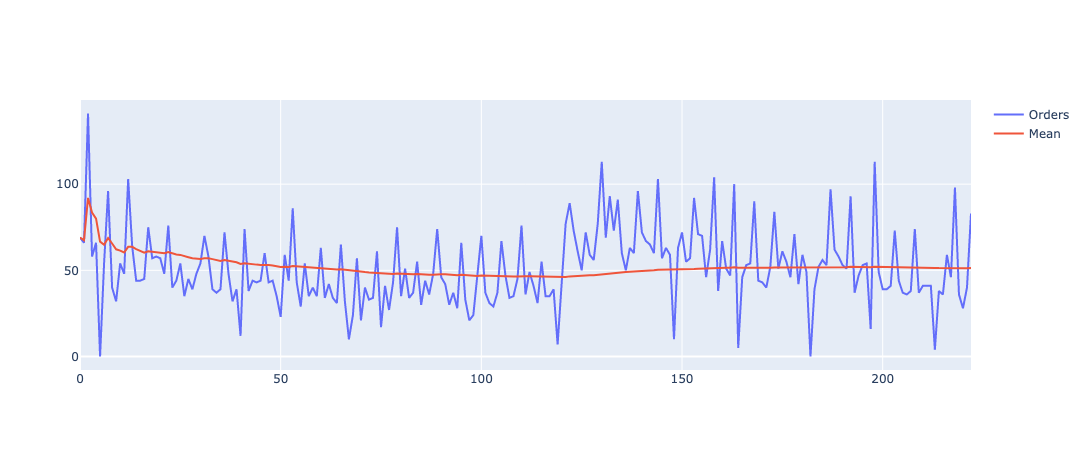

In [92]:
dayly_total_orders = [sum(row[1:]) for indx, row in df_dayly_orders.iterrows()]
n_dates = [i for i in range(len(dayly_total_orders))]
mean = [sum(dayly_total_orders[:i+1]) / (i +1) for i in range(len(n_dates))]

fig = go.Figure()
fig.add_trace(go.Scatter(x=n_dates, y=dayly_total_orders,
                    name='Orders'))
fig.add_trace(go.Scatter(x=n_dates, y=mean,
                    name='Mean'))
fig.show()

## How many times have individual products been ordered ?

In [93]:
products = list(df_dayly_orders.columns)
total_orders_per_product = [df_dayly_orders[product].sum() for product in products]

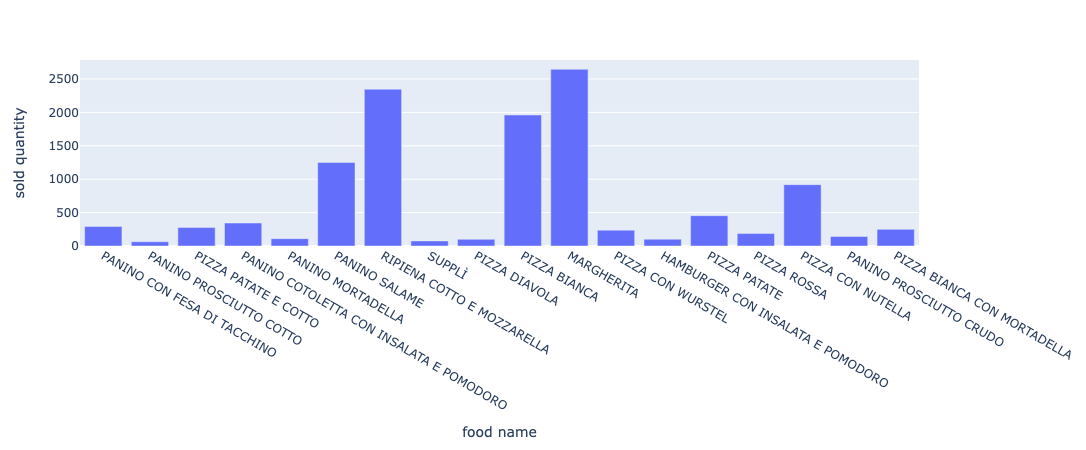

In [94]:
data_df = pd.DataFrame({'food name': products, 'sold quantity': total_orders_per_product})
fig = px.bar(data_df, x='food name', y='sold quantity')
fig.show()

## Which classes ordered the most ?

In [95]:
df_orders = df.copy(deep = True)
del df_orders["ID"]
del df_orders["DAY"]
df_orders.head()

,CLASS,PANINO CON FESA DI TACCHINO,PANINO PROSCIUTTO COTTO,PIZZA PATATE E COTTO,PANINO COTOLETTA CON INSALATA E POMODORO,PANINO MORTADELLA,PANINO SALAME,RIPIENA COTTO E MOZZARELLA,SUPPLÌ,PIZZA DIAVOLA,PIZZA BIANCA,MARGHERITA,PIZZA CON WURSTEL,HAMBURGER CON INSALATA E POMODORO,PIZZA PATATE,PIZZA ROSSA,PIZZA CON NUTELLA,PANINO PROSCIUTTO CRUDO,PIZZA BIANCA CON MORTADELLA
0,1A AFM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1A AFM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1A AFM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1A AFM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1A AFM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [96]:
df_per_classes = df_orders.groupby(df_orders["CLASS"]).sum()
df_per_classes = df_per_classes.reset_index()
df_per_classes.head()

,CLASS,PANINO CON FESA DI TACCHINO,PANINO PROSCIUTTO COTTO,PIZZA PATATE E COTTO,PANINO COTOLETTA CON INSALATA E POMODORO,PANINO MORTADELLA,PANINO SALAME,RIPIENA COTTO E MOZZARELLA,SUPPLÌ,PIZZA DIAVOLA,PIZZA BIANCA,MARGHERITA,PIZZA CON WURSTEL,HAMBURGER CON INSALATA E POMODORO,PIZZA PATATE,PIZZA ROSSA,PIZZA CON NUTELLA,PANINO PROSCIUTTO CRUDO,PIZZA BIANCA CON MORTADELLA
0,1A AFM,6,10,13,7,14,78,238,2,2,106,198,15,0,62,5,16,23,3
1,1A SC,0,0,9,0,0,65,439,0,1,122,314,0,0,108,29,32,0,37
2,1B AFM,60,2,37,40,4,93,193,15,10,52,299,39,10,10,2,82,4,12
3,1B SC,0,0,0,0,0,3,21,0,0,2,19,2,0,2,1,3,0,0
4,1C CAT,0,0,3,80,1,60,172,13,6,43,107,77,18,6,13,171,5,2


In [97]:
classes = list(df_per_classes["CLASS"])
classes = [class_.lower() for class_ in classes]
total_orders_per_class = [sum(row[1:]) for indx, row in df_per_classes.iterrows()]

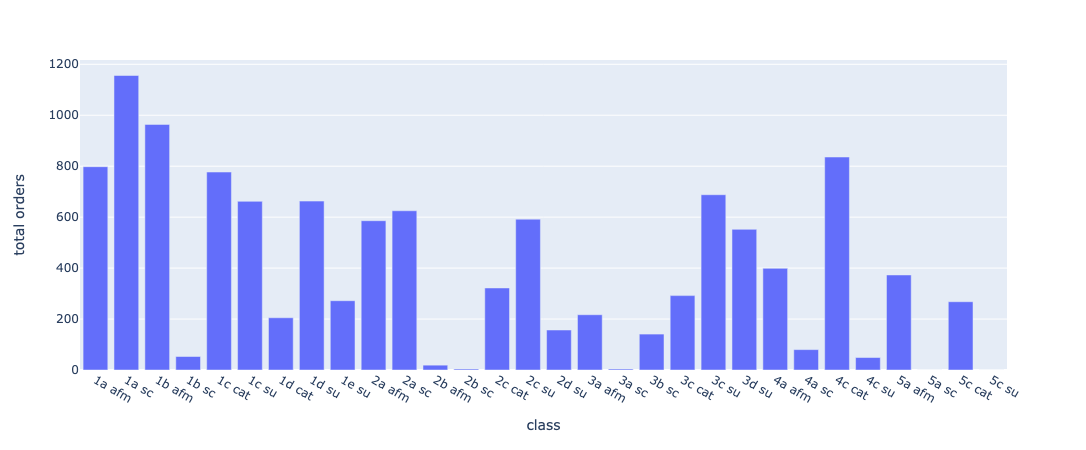

In [98]:
data_df = pd.DataFrame({'total orders': total_orders_per_class, 'class': classes})
fig = px.bar(data_df, x='class', y='total orders')
fig.show()